# **INF1340 FINAL PROJECT**

#### Name: Ashley Wang
#### Student Number: 1004114111

## **Table 1 Visualization**

### Table 1 Tidy data

In [109]:
# import pacakge
import pandas as pd

# Load table 1 and annex table from UN_MigrantStockTotal_2015.xlsx
file = "UN_MigrantStockTotal_2015.xlsx"
MigrantStockTotal_table1 = pd.read_excel(file, sheet_name = 'Table 1', header = 14, usecols="A:W")
annex = pd.read_excel(file, sheet_name = 'ANNEX', header = 14, usecols = 'A:L')


# Drop the useless columns -- sort order, notes
table1 = MigrantStockTotal_table1.drop(['Sort\norder','Notes'], axis = 1)


# Assign the new column names based on the gender and year (b - both sexes, f - female, m - male)
table1 = table1.drop([0])
table1_columns = ('Country','Country Code', 'Data type',
           'b1990','b1995','b2000','b2005', 'b2010','b2015',
           'm1990','m1995','m2000','m2005','m2010','m2015',
           'f1990','f1995','f2000','f2005','f2010','f2015')
table1.columns = table1_columns


# Table of international migrant in major areas
# Assign a new table called area for major area and region
table1_area = table1[table1['Country Code'] >= 900]
table1_area = table1_area.drop(['Data type'], axis = 1)
table1_area = table1_area.melt(id_vars = ['Country', 'Country Code'], 
                     var_name = 'gender',value_name = 'international migrant')

# Seperate gender and year to column variables
table1_area = (table1_area.assign(
        Gender = lambda x: x.gender.str[0].astype(str),
        Year = lambda x: x.gender.str[1:].astype(str)).drop('gender', axis = 1))

# Replace the character of gender into a clear word
table1_area = table1_area.replace(to_replace = ['b','m','f'], value = ['Both sexes', 'Male', 'Female'])

# Table of international migrant in all countries
# Remove the major area and region rows 
table1 = table1.drop(table1[table1['Country Code'] >= 900].index)



# Assign the major area, region, developed, least developed, and Sub-Saharan Africa columns from annex table
# based on the equal country name
major_area = [] 
region = [] 
developed = [] 
least_dev = [] 
sub_africa = []
for i in range (len(table1)):
    for j in range(len(annex)):
        if table1['Country'].values[i] == annex['Country or area'].values[j]:
            major_area.append(annex['Major area'].values[i])
            region.append(annex['Region'].values[i])
            developed.append(annex['Developed region'].values[i])
            least_dev.append(annex['Least developed country'].values[i])
            sub_africa.append(annex['Sub-Saharan Africa'].values[i])

table1 = table1.assign(Major_area = major_area, 
                       Region = region, 
                       Developed_region = developed,
                       Least_developed_country = least_dev,
                       Sub_Saharan_Africa = sub_africa)


# Change the contry code to integer value
table1['Country Code'] = table1['Country Code'].astype(int)

# Assign gender and population as two new column
# in order to let column names to be informative, variable names and not values
table1 = table1.melt(id_vars = ['Country', 'Country Code', 'Data type','Major_area','Region', 'Developed_region','Least_developed_country','Sub_Saharan_Africa'], 
                     var_name = 'gender',value_name = 'international migrant')

# Seperate gender and year to column variables
table1 = (table1.assign(
        Gender = lambda x: x.gender.str[0].astype(str),
        Year = lambda x: x.gender.str[1:].astype(str)).drop('gender', axis = 1))

# Replace the character of gender into a clear word
table1 = table1.replace(to_replace = ['b','m','f'], value = ['Both sexes', 'Male', 'Female'])

# Relocate the column order
table1 = table1.iloc[:,[0,1,2,9,10,8,3,4,5,6,7]]

# Set the country code as the index of the dataframe
table1 = table1.set_index(['Country Code'])


### Table 1 Line Graph of International Migrant Changes in Different Major Area during 1990 - 2015

In [110]:
import plotly.express as px
table1_major_area = table1_area[table1_area['Country'].isin(['Africa', 'Asia','Europe','Latin America and the Caribbean','Northern America','Oceania']) ]
fig = px.line(table1_major_area, x="Year", y="international migrant", facet_col="Country",color = 'Gender', facet_col_wrap=3,
              facet_row_spacing=0.04, # default is 0.07 when facet_col_wrap is used
              facet_col_spacing=0.04, # default is 0.03
              height=700, width=1300,
              title="International Migrant in Different Major Area")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(showticklabels=True)
fig.show()

## **Table 2 Visualization**

### Table 2 Tidy data

In [111]:
import pandas as pd

# Load table 1 and annex table from UN_MigrantStockTotal_2015.xlsx
file = "UN_MigrantStockTotal_2015.xlsx"
MigrantStockTotal_table2 = pd.read_excel(file, sheet_name = 'Table 2', header = 14, usecols="A:V")
annex = pd.read_excel(file, sheet_name = 'ANNEX', header = 14, usecols = 'A:L')

# Drop the useless variables from the table2 columns -- sort order, notes
table2 = MigrantStockTotal_table2.drop(['Sort\norder','Notes'], axis = 1)

# Assign new coloumn names
table2 = table2.drop([0])
table2_columns = ('Country','Country Code', 
           'b1990','b1995','b2000','b2005', 'b2010','b2015',
           'm1990','m1995','m2000','m2005','m2010','m2015',
           'f1990','f1995','f2000','f2005','f2010','f2015')

table2.columns = table2_columns

# Major Area Table: table of total population in marjor areas 
# Assign a new table called area for major area and region
table2_area = table2[table2['Country Code'] >= 900]
table2_area = table2_area.melt(id_vars = ['Country', 'Country Code'], 
                     var_name = 'gender',value_name = 'population')

# Seperate gender and year to column variables
table2_area = (table2_area.assign(
        Gender = lambda x: x.gender.str[0].astype(str),
        Year = lambda x: x.gender.str[1:].astype(str)).drop('gender', axis = 1))

# Replace the character of gender into a clear word
table2_area = table2_area.replace(to_replace = ['b','m','f'], value = ['Both sexes', 'Male', 'Female'])

# Country Table: table of total population in different countries
# Create a table for all the countries

# Remove the major area and region rows 
table2 = table2.drop(table2[table2['Country Code'] >= 900].index)

# Assign the major area, region, developed, least developed, and Sub-Saharan Africa columns from annex table
# based on the equal country name
major_area = [] 
region = [] 
developed = [] 
least_dev = [] 
sub_africa = []
for i in range (len(table2)):
    for j in range(len(annex)):
        if table2['Country'].values[i] == annex['Country or area'].values[j]:
            major_area.append(annex['Major area'].values[i])
            region.append(annex['Region'].values[i])
            developed.append(annex['Developed region'].values[i])
            least_dev.append(annex['Least developed country'].values[i])
            sub_africa.append(annex['Sub-Saharan Africa'].values[i])
table2 = table2.assign(Major_area = major_area, 
                       Region = region, 
                       Developed_region = developed,
                       Least_developed_country = least_dev,
                       Sub_Saharan_Africa = sub_africa)

# Change the country code values to integer
table2['Country Code'] = table2['Country Code'].astype(int)

# Assign gender and population as two new column
# in order to let column names to be informative, variable names and not values
table2 = table2.melt(id_vars = ['Country', 'Country Code', 'Major_area','Region', 'Developed_region','Least_developed_country','Sub_Saharan_Africa'], 
                     var_name = 'gender',value_name = 'population' )

# Seperate the year from gender variable
table2 = (table2.assign(
        Gender = lambda x: x.gender.str[0].astype(str),
        Year = lambda x: x.gender.str[1:].astype(str)).drop('gender', axis = 1))

# Replace the gender acronyms to word
table2 = table2.replace(to_replace = ['b','m','f'], value = ['Both sexes', 'Male', 'Female'])

# Relocate the column 
table2 = table2.iloc[:,[0,1,8,9,7,2,3,4,5,6]]

# Set country code as new index
table2 = table2.set_index(['Country Code'])


### Table 2 Bar Chart for Comparing Male and Female Population with changes of Year, 1990 - 2015

In [112]:
import plotly.express as px

table2_world = table2_area[table2_area['Country Code'] == 900]
table2_world = table2_world[table2_world['Gender'] != 'Both sexes']

fig = px.bar(table2_world, x="Year", y="population",
             color='Gender', barmode='group',
             height=400, title = 'Comparison of male and female population at mid-year')
fig.show()



## **Table 3 Visualization**

### Table 3 Tidy Data

In [113]:
import pandas as pd
file = "UN_MigrantStockTotal_2015.xlsx"
MigrantStockTotal_table3 = pd.read_excel(file, sheet_name = 'Table 3', header = 14, usecols="A:W")
table3 = MigrantStockTotal_table3.drop(['Sort\norder','Notes'], axis = 1)
table3 = table3.drop([0])
table3_columns = ('Country','Country Code', 'Data type',
           'b1990','b1995','b2000','b2005', 'b2010','b2015',
           'm1990','m1995','m2000','m2005','m2010','m2015',
           'f1990','f1995','f2000','f2005','f2010','f2015')
table3.columns = table3_columns


# Major Area Table: table for international migrant rate in different areas
# Assign a new table called area for major area and region
table3_area = table3[table3['Country Code'] >= 900]
table3_area = table3_area.melt(id_vars = ['Country', 'Country Code','Data type'], 
                     var_name = 'gender',value_name = 'international migrant rate')

# Seperate gender and year to column variables
table3_area = (table3_area.assign(
        Gender = lambda x: x.gender.str[0].astype(str),
        Year = lambda x: x.gender.str[1:].astype(str)).drop('gender', axis = 1))

# Replace the character of gender into a clear word
table3_area = table3_area.replace(to_replace = ['b','m','f'], value = ['Both sexes', 'Male', 'Female'])


# Country Table: table of international migrant rate in different countries
table3 = table3.drop(table3[table3['Country Code'] >= 900].index)

# Assign the major area, region, developed, least developed, and Sub-Saharan Africa columns from annex table
# based on the equal country name
major_area = [] 
region = [] 
developed = [] 
least_dev = [] 
sub_africa = []
for i in range (len(table3)):
    for j in range(len(annex)):
        if table3['Country'].values[i] == annex['Country or area'].values[j]:
            major_area.append(annex['Major area'].values[i])
            region.append(annex['Region'].values[i])
            developed.append(annex['Developed region'].values[i])
            least_dev.append(annex['Least developed country'].values[i])
            sub_africa.append(annex['Sub-Saharan Africa'].values[i])

table3 = table3.assign(Major_area = major_area, 
                       Region = region, 
                       Developed_region = developed,
                       Least_developed_country = least_dev,
                       Sub_Saharan_Africa = sub_africa)

# Change the country code values to integer
table3['Country Code'] = table3['Country Code'].astype(int)

# Assign gender and international migrant proportion as two new column
# in order to let column names to be informative, variable names and not values
table3 = table3.melt(id_vars = ['Country', 'Country Code', 'Data type','Major_area','Region', 'Developed_region','Least_developed_country','Sub_Saharan_Africa'], 
                     var_name = 'gender',value_name = 'international migrant rate')

# Seperate the year from gender variable
table3 = (table3.assign(
        Gender = lambda x: x.gender.str[0].astype(str),
        Year = lambda x: x.gender.str[1:].astype(str)).drop('gender', axis = 1))

# Replace the gender acronyms to word
table3 = table3.replace(to_replace = ['b','m','f'], value = ['Both sexes', 'Male', 'Female'])

# Relocate the column order
table3 = table3.iloc[:,[0,1,2,9,10,8,3,4,5,6,7]]

# Set country code as new index
table3 = table3.set_index(['Country Code'])


### Table 3 Box plot of International Migrant Rate

In [114]:
fig = px.box(table3, x="Year", y="international migrant rate", color="Gender", title = 'Box plot of International Migrant Rate during 1990-2015')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

## **Table 4 Visualization**

### Table 4 Tidy Data

In [115]:
import pandas as pd
file = "UN_MigrantStockTotal_2015.xlsx"
MigrantStockTotal_table4 = pd.read_excel(file, sheet_name = 'Table 4', header = 14)
table4 = MigrantStockTotal_table4.drop(['Sort\norder','Notes'], axis = 1)
table4 = table4.drop([0])
table4_columns = ('Country','Country Code', 'Data type', '1990','1995','2000', '2005', '2010', '2015')
table4.columns = table4_columns


# Major Area Table: table of female international migrant in different areas
# Assign a new table called area for major area and region
table4_area = table4[table4['Country Code'] >= 900]
table4_area = table4_area.drop(['Data type'], axis = 1)
table4_area = table4_area.melt(id_vars = ['Country', 'Country Code'], 
                     var_name = 'Year',value_name = 'female migrant rate')

# Country Table: table of female internatinal migrant in different countries
table4 = table4.drop(table4[table4['Country Code'] >= 900].index)

# Assign the major area, region, developed, least developed, and Sub-Saharan Africa columns from annex table
# based on the equal country name
major_area = [] 
region = [] 
developed = [] 
least_dev = [] 
sub_africa = []
for i in range (len(table4)):
    for j in range(len(annex)):
        if table4['Country'].values[i] == annex['Country or area'].values[j]:
            major_area.append(annex['Major area'].values[i])
            region.append(annex['Region'].values[i])
            developed.append(annex['Developed region'].values[i])
            least_dev.append(annex['Least developed country'].values[i])
            sub_africa.append(annex['Sub-Saharan Africa'].values[i])
table4 = table4.assign(Major_area = major_area, 
                       Region = region, 
                       Developed_region = developed,
                       Least_developed_country = least_dev,
                       Sub_Saharan_Africa = sub_africa)

# Change the country code values to integer
table4['Country Code'] = table4['Country Code'].astype(int)

# Assign gender and international migrant proportion as two new column
# in order to let column names to be informative, variable names and not values
table4 = table4.melt(id_vars = ['Country', 'Country Code', 'Data type','Major_area','Region', 'Developed_region','Least_developed_country','Sub_Saharan_Africa'], 
                     var_name = 'Year',value_name = 'female international migrant rate')

# Relocate the column order
table4 = table4.iloc[:, [0,1,2,8,9,3,4,5,6,7]]

# Set country code as new index
table4 = table4.set_index(['Country Code'])


### Table 4 Line Graph of Female Internation Migrant Changes in Major Area during 1990 - 2015

In [116]:
import plotly.express as px
table4_major_area = table4_area[table4_area['Country'].isin(['Africa', 'Asia','Europe','Latin America and the Caribbean','Northern America','Oceania']) ]
fig = px.line(table4_major_area, x="Year", y="female migrant rate", facet_col="Country", facet_col_wrap=3,
              facet_row_spacing=0.04, # default is 0.07 when facet_col_wrap is used
              facet_col_spacing=0.04, # default is 0.03
              height=600, width=1000,
              title="Female International Migrant Rate Float in Different Major Area during 1990 - 2015")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(showticklabels=True)
fig.show()

## **Table 5 Visualization**

### Table 5 Tidy Data

In [117]:
import pandas as pd
file = "UN_MigrantStockTotal_2015.xlsx"
MigrantStockTotal_table5 = pd.read_excel(file, sheet_name = 'Table 1', header = 14, usecols="A:T")
table5 = MigrantStockTotal_table5.drop(['Sort\norder','Notes'], axis = 1)
table5 = table5.drop([0])
table5_columns = ('Country','Country Code', 'Data type',
           'b1990-1995','b1995-2000','b2000-2005','b2005-2010', 'b2010-2015',
           'm1990-1995','m1995-2000','m2000-2005','m2005-2010','m2010-2015',
           'f1990-1995','f1995-2000','f2000-2005','f2005-2010','f2010-2015')
table5.columns = table5_columns

#Major Area Table: table of migrant stock annual rate of change of different areas
# Assign a new table called area for major area and region
table5_area = table5[table5['Country Code'] >= 900]
table5_area = table5_area.melt(id_vars = ['Country', 'Country Code','Data type'], 
                     var_name = 'gender',value_name = 'annual rate of change')

# Seperate gender and year to column variables
table5_area = (table5_area.assign(
        Gender = lambda x: x.gender.str[0].astype(str),
        Year = lambda x: x.gender.str[1:].astype(str)).drop('gender', axis = 1))

# Replace the character of gender into a clear word
table5_area = table5_area.replace(to_replace = ['b','m','f'], value = ['Both sexes', 'Male', 'Female'])



# Counrty Table: table of migrant stock annual rate of change of different countries
table5 = table5.drop(table5[table5['Country Code'] >= 900].index)

# Assign the major area, region, developed, least developed, and Sub-Saharan Africa columns from annex table
# based on the equal country name
major_area = [] 
region = [] 
developed = [] 
least_dev = [] 
sub_africa = []
for i in range (len(table5)):
    for j in range(len(annex)):
        if table5['Country'].values[i] == annex['Country or area'].values[j]:
            major_area.append(annex['Major area'].values[i])
            region.append(annex['Region'].values[i])
            developed.append(annex['Developed region'].values[i])
            least_dev.append(annex['Least developed country'].values[i])
            sub_africa.append(annex['Sub-Saharan Africa'].values[i])

table5 = table5.assign(Major_area = major_area, 
                       Region = region, 
                       Developed_region = developed,
                       Least_developed_country = least_dev,
                       Sub_Saharan_Africa = sub_africa)

table5['Country Code'] = table5['Country Code'].astype(int)
table5 = table5.melt(id_vars = ['Country', 'Country Code', 'Data type','Major_area','Region', 'Developed_region','Least_developed_country','Sub_Saharan_Africa'], 
                     var_name = 'gender',value_name = 'Migrant stock annual rate of change')

# Seperate the year from gender variable
table5 = (table5.assign(
        Gender = lambda x: x.gender.str[0].astype(str),
        Year = lambda x: x.gender.str[1:].astype(str)).drop('gender', axis = 1))

# Replace the gender acronyms to word
table5 = table5.replace(to_replace = ['b','m','f'], value = ['Both sexes', 'Male', 'Female'])

# Relocate the column order
table5 = table5.iloc[:,[0,1,2,9,10,8,3,4,5,6,7]]

# Set country code as new index
table5 = table5.set_index(['Country Code'])

table5_area

,Country,Country Code,Data type,annual rate of change,Gender,Year
0,WORLD,900.0,NaN,152563212,Both sexes,1990-1995
1,Developed regions,901.0,NaN,82378628,Both sexes,1990-1995
2,Developing regions,902.0,NaN,70184584,Both sexes,1990-1995
3,Least developed countries,941.0,NaN,11075966,Both sexes,1990-1995
4,Less developed regions excluding least develop...,934.0,NaN,59105261,Both sexes,1990-1995
...,...,...,...,...,...,...
490,Oceania,909.0,NaN,2683884,Female,2010-2015
491,Australia and New Zealand,927.0,NaN,2545236,Female,2010-2015
492,Melanesia,928.0,NaN,41377,Female,2010-2015
493,Micronesia,954.0,NaN,65258,Female,2010-2015


### Table 5 Line Graph of Migrant Stock Annual Rate of Change during 1990-2015

In [118]:
import plotly.express as px
table5_major_area = table5_area[table5_area['Country'].isin(['Africa', 'Asia','Europe','Latin America and the Caribbean','Northern America','Oceania']) ]
fig = px.line(table5_major_area, x="Year", y="annual rate of change", facet_col="Country",color = 'Gender', facet_col_wrap=3,
              facet_row_spacing=0.04, # default is 0.07 when facet_col_wrap is used
              facet_col_spacing=0.04, # default is 0.03
              height=600, width=1000,
              title="International Migrant Annual Rate of Change Float in Different Major Area")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_yaxes(showticklabels=True)
fig.show()

## **Table 6 Visualization**

### Table 6 Tidy Data

In [119]:
import pandas as pd
# Load table 1 and annex table from UN_MigrantStockTotal_2015.xlsx
file = "UN_MigrantStockTotal_2015.xlsx"
MigrantStockTotal_table6 = pd.read_excel(file, sheet_name = 'Table 6', header = 14, usecols="A:V")
annex = pd.read_excel(file, sheet_name = 'ANNEX', header = 14, usecols = 'A:L')


# Drop the useless columns -- sort order, notes
table6 = MigrantStockTotal_table6.drop(['Sort\norder','Notes'], axis = 1)


# Assign the new column names based on the gender and year (b - both sexes, f - female, m - male)
table6 = table6.drop([0])
table6_columns = ('Country','Country Code', 'Data type',
           '1990','1995','2000','2005', '2010','2015',
           '1990','1995','2000','2005','2010','2015',
           '1990-1995','1995-2000','2000-2005','2005-2010','2010-2015')
table6.columns = table6_columns


#Major Area Table
# Assign a new table called area for major area and region
table6_area = table6[table6['Country Code'] >= 900]
# Seperate the estimated refugee stock at mid-year from the table 6
table6_area_estimate = table6_area.iloc[:,[0,1,2,3,4,5,6,7,8]]

# Assign Estimated refugee stock as a new column
# in order to let column names to be informative, variable names and not values
table6_area_estimate = table6_area_estimate.melt(id_vars = ['Country', 'Country Code','Data type'], 
                         var_name = 'Year', value_name = 'Estimated refugee stock')

# table6 area proportion
table6_area_proportion = table6.iloc[:,[0,1,2,9,10,11,12,13,14]]
# Assign Refugees proportion as a new column
# in order to let column names to be informative, variable names and not values
table6_area_proportion = table6_area_proportion.melt(id_vars = ['Country', 'Country Code','Data type'], 
                         var_name = 'Year', value_name = 'Refugees proportion')

# table6 area annual rate of change
table6_area_annual = table6_area.iloc[:,[0,1,2,15,16,17,18,19]]
table6_area_annual = table6_area_annual.melt(id_vars = ['Country', 'Country Code','Data type'], 
                         var_name = 'Year', value_name = 'Annual rate of change')

# Counrty Table
# Remove the major area and region rows 
table6 = table6.drop(table6[table6['Country Code'] >= 900].index)

# Assign the major area, region, developed, least developed, and Sub-Saharan Africa columns from annex table
# based on the equal country name
major_area = [] 
region = [] 
developed = [] 
least_dev = [] 
sub_africa = []
for i in range (len(table6)):
    for j in range(len(annex)):
        if table6['Country'].values[i] == annex['Country or area'].values[j]:
            major_area.append(annex['Major area'].values[i])
            region.append(annex['Region'].values[i])
            developed.append(annex['Developed region'].values[i])
            least_dev.append(annex['Least developed country'].values[i])
            sub_africa.append(annex['Sub-Saharan Africa'].values[i])

table6 = table6.assign(Major_area = major_area, 
                       Region = region, 
                       Developed_region = developed,
                       Least_developed_country = least_dev,
                       Sub_Saharan_Africa = sub_africa)



# Change the contry code to integer value
table6['Country Code'] = table6['Country Code'].astype(int)

# Seperate the estimated refugee stock at mid-year from the table 6
table6_e = table6.iloc[:,[0,1,2,3,4,5,6,7,8,20,21,22,23,24]]

# Assign Estimated refugee stock as a new column
# in order to let column names to be informative, variable names and not values
table6_estimate = table6_e.melt(id_vars = ['Country', 'Country Code','Data type','Major_area','Region', 'Developed_region','Least_developed_country','Sub_Saharan_Africa'], 
                         var_name = 'Year', value_name = 'Estimated refugee stock')

# Seperate Refugees as a percentage of the international migrant stock from the table 6
table6_r = table6.iloc[:,[0,1,2,9,10,11,12,13,14,20,21,22,23,24]]

# Assign Refugees proportion as a new column
# in order to let column names to be informative, variable names and not values
table6_proportion = table6_r.melt(id_vars = ['Country', 'Country Code','Data type','Major_area','Region', 'Developed_region','Least_developed_country','Sub_Saharan_Africa'], 
                         var_name = 'Year', value_name = 'Refugees proportion')

# Seperate Annual rate of change of the refugee stock from the table 6
table6_a = table6.iloc[:,[0,1,2,15,16,17,18,19,20,21,22,23,24]]

# Assign Annual rate of change as a new column
# in order to let column names to be informative, variable names and not values
table6_annual = table6_a.melt(id_vars = ['Country', 'Country Code','Data type','Major_area','Region', 'Developed_region','Least_developed_country','Sub_Saharan_Africa'], 
                         var_name = 'Year', value_name = 'Annual rate of change')


# Create a new datafram that include the data from table6_estimate with year equal to 1990
table6_estimate_1990 = table6_estimate[table6_estimate['Year'] == '1990'].replace('..',0)
table6_estimate_1995 = table6_estimate[table6_estimate['Year'] == '1995'].replace('..',0)
table6_estimate_2000 = table6_estimate[table6_estimate['Year'] == '2000'].replace('..',0)
table6_estimate_2005 = table6_estimate[table6_estimate['Year'] == '2005'].replace('..',0)
table6_estimate_2010 = table6_estimate[table6_estimate['Year'] == '2010'].replace('..',0)
table6_estimate_2015 = table6_estimate[table6_estimate['Year'] == '2015'].replace('..',0)


# Visualizing the Top 10 Contries 
estimate_1990_top10 = table6_estimate_1990.sort_values('Estimated refugee stock').tail(10)
estimate_1995_top10 = table6_estimate_1995.sort_values('Estimated refugee stock').tail(10)
estimate_2000_top10 = table6_estimate_2000.sort_values('Estimated refugee stock').tail(10)
estimate_2005_top10 = table6_estimate_2005.sort_values('Estimated refugee stock').tail(10)
estimate_2010_top10 = table6_estimate_2010.sort_values('Estimated refugee stock').tail(10)
estimate_2015_top10 = table6_estimate_2015.sort_values('Estimated refugee stock').tail(10)


### Table 6 Bar Chart shows the top 10 Estimate Refugee Stock Countries with the change of time

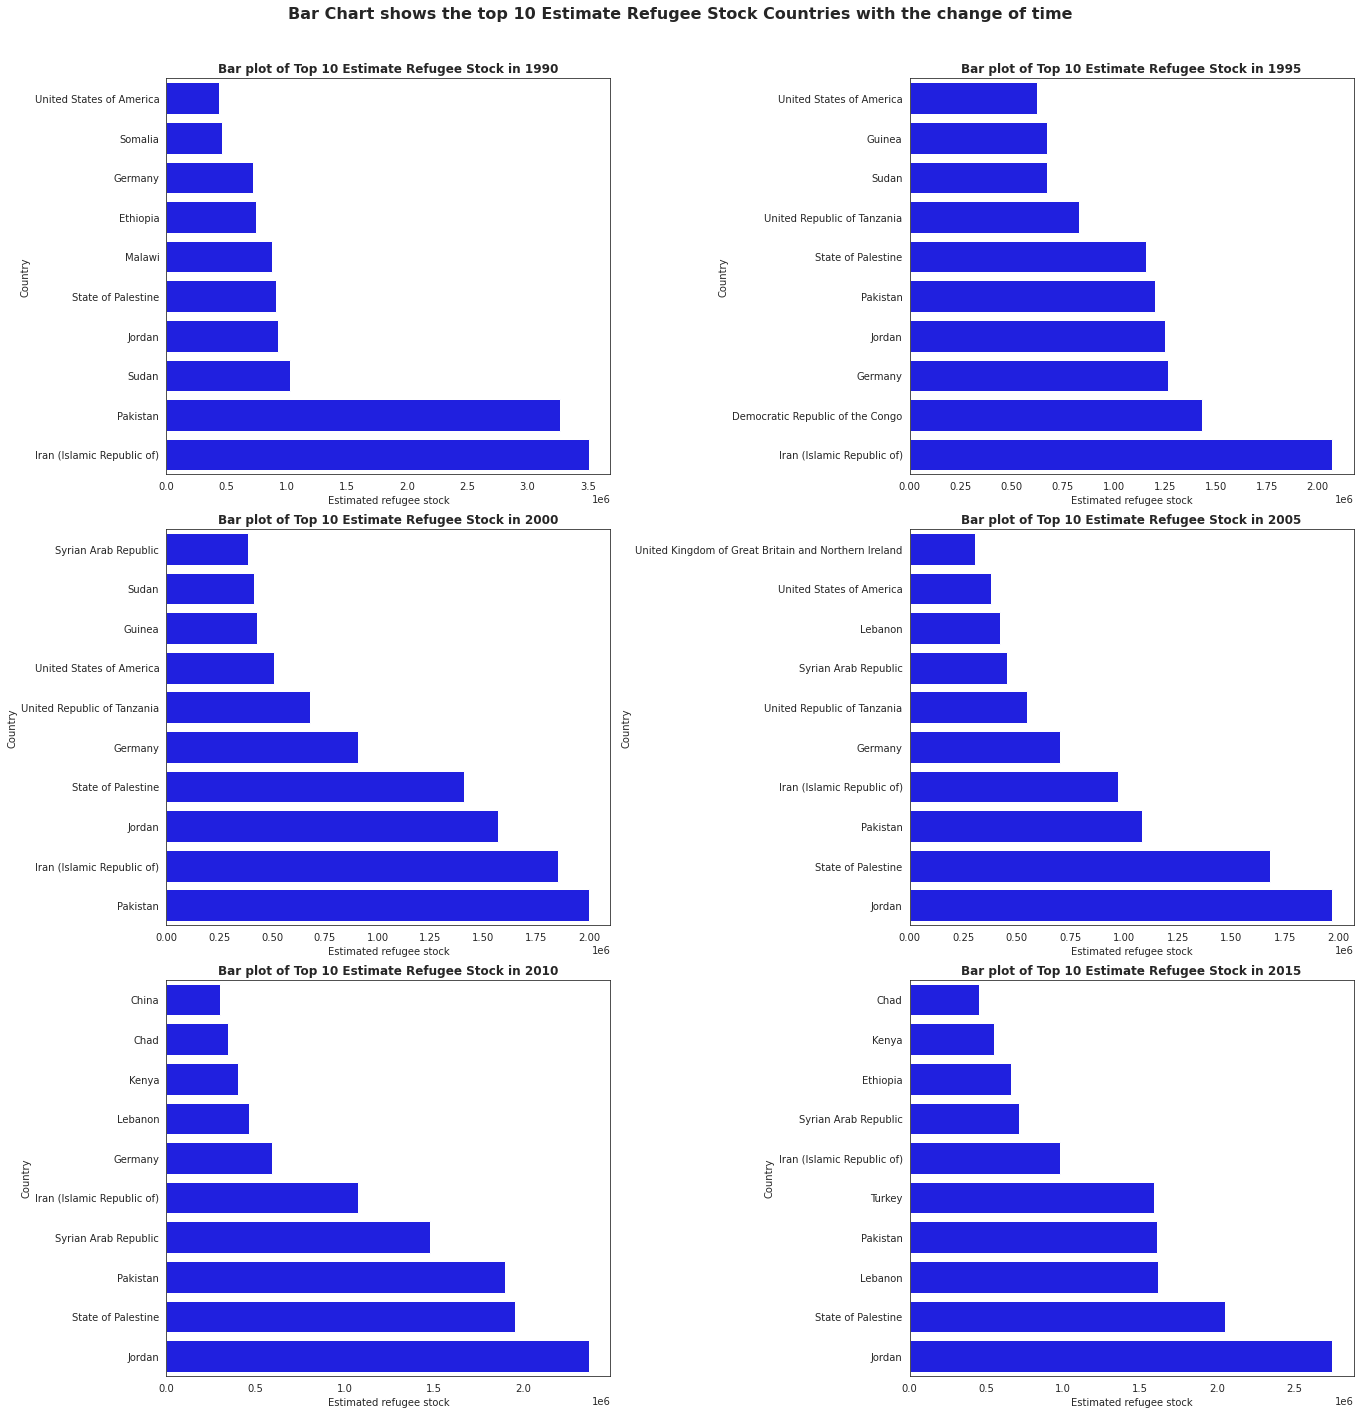

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import pandas as pd
import plotly.express as px

sns.set_style('white')

#we will be showing 
f, ax = plt.subplots(3, 2, figsize=(19,20))
f.suptitle('Bar Chart shows the top 10 Estimate Refugee Stock Countries with the change of time',fontweight='bold',fontsize=16)


ax[0,0].set_title('Bar plot of Top 10 Estimate Refugee Stock in 1990',fontweight="bold")
ax[0,0].set_ylabel('Estimate refugee stock')
ax[0,0].set_xlabel('Country')
sns.barplot(x="Estimated refugee stock", y="Country", data=estimate_1990_top10, ax=ax[0,0],orient = 'h', color = 'blue')

ax[0,1].set_title('Bar plot of Top 10 Estimate Refugee Stock in 1995',fontweight="bold")
ax[0,1].set_ylabel('Estimate refugee stock')
ax[0,1].set_xlabel('Country')
sns.barplot(x="Estimated refugee stock", y="Country", data=estimate_1995_top10, ax=ax[0,1], orient = 'h', color = "blue")

ax[1,0].set_title('Bar plot of Top 10 Estimate Refugee Stock in 2000',fontweight="bold")
ax[1,0].set_ylabel('Estimate refugee stock')
ax[1,0].set_xlabel('Country')
sns.barplot(x="Estimated refugee stock", y="Country", data=estimate_2000_top10, ax=ax[1,0], orient = 'h', color = "blue")

ax[1,1].set_title('Bar plot of Top 10 Estimate Refugee Stock in 2005',fontweight="bold")
ax[1,1].set_ylabel('Estimate refugee stock')
ax[1,1].set_xlabel('Country')
sns.barplot(x="Estimated refugee stock", y="Country", data=estimate_2005_top10, ax=ax[1,1], orient = 'h', color = "blue")

ax[2,0].set_title('Bar plot of Top 10 Estimate Refugee Stock in 2010',fontweight="bold")
ax[2,0].set_ylabel('Estimate refugee stock')
ax[2,0].set_xlabel('Country')
sns.barplot(x="Estimated refugee stock", y="Country", data=estimate_2010_top10, ax=ax[2,0], orient = 'h', color = "blue")

ax[2,1].set_title('Bar plot of Top 10 Estimate Refugee Stock in 2015',fontweight="bold")
ax[2,1].set_ylabel('Estimate refugee stock')
ax[2,1].set_xlabel('Country')
sns.barplot(x="Estimated refugee stock", y="Country", data=estimate_2015_top10, ax=ax[2,1], orient = 'h', color = "blue")

f.tight_layout()
f.subplots_adjust(top=.93)
plt.show()



### Table 6 Line Graph of World's Refugees Proportion Changes, 1990-2015

In [121]:
table6_proportion_world = table6_area_proportion[table6_area_proportion['Country Code'] == 900]

fig = px.line(table6_proportion_world, x="Year", y="Refugees proportion", title = "Line Graph of World's Refugees Proportion Changes, 1990-2015")
fig.show()



### Table 6 Bar chart of refugee annual rate of change belongs to different development status, 1990-2015

In [122]:
table6_annual_dev = table6_area_annual[table6_area_annual['Country Code'].isin([901,902,941,934]) ]
fig = px.bar(table6_annual_dev, x = 'Year', y = 'Annual rate of change', color = 'Country', barmode = 'group', 
             title = 'Refugee Anual rate of change belongs to different development status, 1990-2015')
fig.show()